# PRACTICA INDEPENDENTE: Regressão logística. 

### Introdução.

#### Nessa prática independente estamos interessados em entender como os seguintes atributos descritivos afetam a probabilidade de admissão ou admissão de cada candidato. 

* gre: Graduate Record Exam.
* gpa: Grade Point Average - nota média.
* Prestige: Prestígio da instituição de proveniência.

#### Para isso, é construída uma amostra de 400 pedidos de admissão em universidades, 10 universidades e as informações correspondentes são registradas.

#### A variável dependente é o resultado final da admissão, com o estudante admitido ($admit = 1$) ou não admitido ($admit = 0$).

#### Exercício 1: Importe as bibliotecas necessárias para a realização de uma análise exploratória e uma regressão logística  capaz de prever os casos de admissão. Crie um dataframe a partir dos dados do arquivo `'binary.csv'`. Lembre-se que o valor `prestige = 1` é o mais alto na escala de medidas desse atributo.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import linear_model

In [4]:
df = pd.read_csv('binary.csv')
df.head()

,admit,gre,gpa,prestige
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [5]:
df['prestige'].unique()

array([3, 1, 4, 2])

#### Exercício 2: Estude as medidas centrais da distribuição, faça a contagem dos valores de `admit` para ter uma ideia da distribuição de casos aceitos e não aceitos. 

#### Crie uma análise exploratória gráfica dos dados, com um gráfico do tipo  `pairplot` para todos os atributos do dataset. 

#### Faça também um gráfico do tipo `FacetGrid`, separando por `prestige` a população de casos `admit = 0` e `admit = 1`. Você pode usar os atributos `gre` e `gpa` como eixos das dispersões.

In [6]:
df.describe()

,admit,gre,gpa,prestige
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


In [7]:
df['admit'].value_counts(normalize = True)

0    0.6825
1    0.3175
Name: admit, dtype: float64

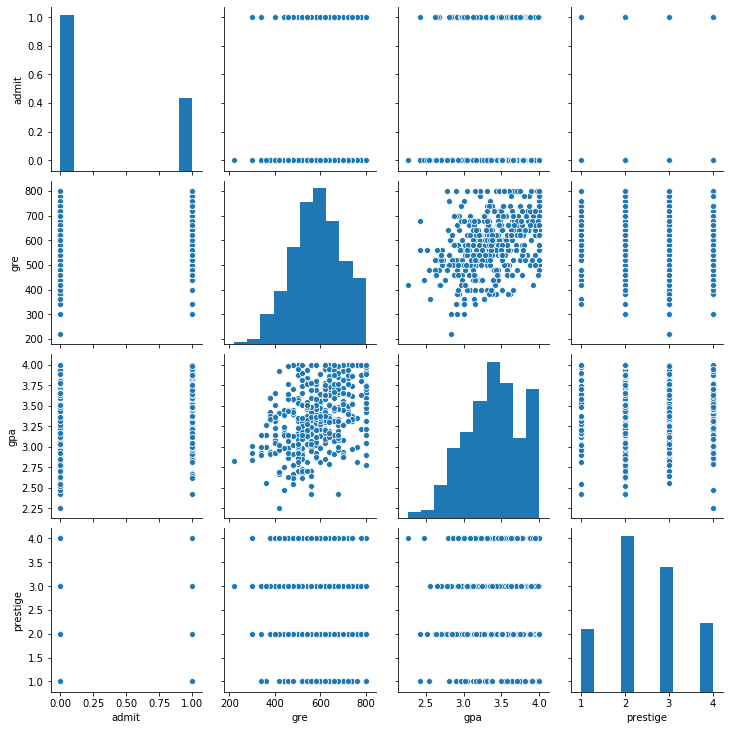

In [8]:
sns.pairplot(df);

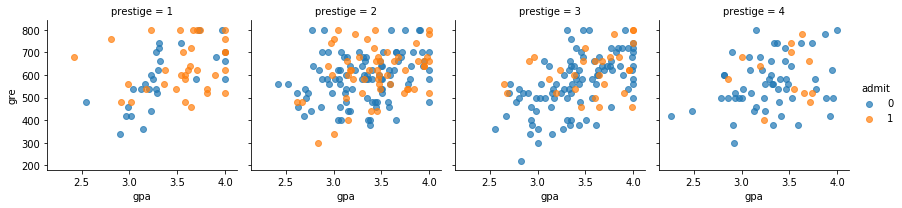

In [9]:
g = sns.FacetGrid(df, 
                  col = "prestige", 
                  hue = "admit"
                 )
g.map(plt.scatter, 
      "gpa", 
      "gre", 
      alpha = 0.7
     )
g.add_legend();

#### Exercício 3: Crie um conjunto de boxplots para as distribuições `gre`, `gpa` e `prestige`, em função dos valores de `admit` para entender melhor como cada um dos atributos acima influencia a admissão dos estudantes.

/Users/rudineycasali/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/boxplot.py:375: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  **kwds,


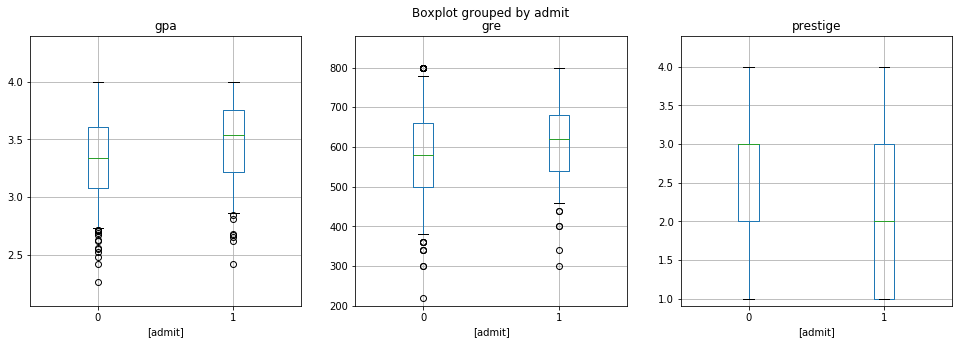

In [10]:
fig, ax_new = plt.subplots(1, 
                           3, 
                           sharey = False, 
                           figsize = (16,5)
                          )
axes_ = df.boxplot(by = 'admit', 
                   ax = ax_new, 
                   return_type = 'axes', 
                   whis = [5,95]
                  );

for ax,col in zip(axes_,['gpa','gre','prestige']):
    
    ax.set_ylim(df[col].min()/1.1, 
                df[col].max()*1.1
               )

#### Exercício 4: Crie também uma `crosstab()` cruzando os dados de admissão `admit` com o prestígio da instituição de origem do candidato, para estudar as contagens de admissão e inadmissão.

In [11]:
pd.crosstab(df['admit'], 
            df['prestige'], 
            rownames = ['admit']
           )

prestige,1,2,3,4
admit,,,,
0,28,97,93,55
1,33,54,28,12


#### Exercício 5: Realize a dmummiezação da variável `prestige`  com a função [`.get_dummies()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html), instanciando um novo dataframe  e então concatene o novo dataframe dos atributos dummiezados com o dataframe original .

#### Separe os dados entre os atributos descritivos e o target e realize a divisão do dataframe em subconjuntos de treino e teste.

In [12]:
dummy_prestige = pd.get_dummies(df["prestige"], 
                                prefix = "prestige"
                               )

data = pd.concat([df, dummy_prestige], 
                 axis = 1
                )

data.head()

,admit,gre,gpa,prestige,prestige_1,prestige_2,prestige_3,prestige_4
0,0,380,3.61,3,0,0,1,0
1,1,660,3.67,3,0,0,1,0
2,1,800,4.00,1,1,0,0,0
3,1,640,3.19,4,0,0,0,1
4,0,520,2.93,4,0,0,0,1


In [13]:
X = data[['gre', 'gpa', 'prestige_2', 'prestige_3', 'prestige_4']]
y = data["admit"]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    stratify = y, 
                                                    random_state = 12
                                                   )

#### Exercício 6: Aplique o processo de criação de uma regressão logística com a padronização dos dados. 

#### Submeta os dados às regressões estudadas com o auxílio das bibliotecas `sklearn` e `statsmodels` e discuta os resultados.

#### padronização:

In [15]:
# Utilizamos sklearn para estandarizar la matriz de Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

#### Regressão Logística com o `sklearn`:

In [16]:
lg = linear_model.LogisticRegression()

lg.fit(X_train_scaled, y_train)

X_test_scaled = scaler.transform(X_test)

y_pred_train = lg.predict(X_train_scaled)

y_pred_test = lg.predict(X_test_scaled)

In [17]:
lg.coef_

array([[ 0.19831922,  0.22734852, -0.27467064, -0.48400602, -0.50951716]])

In [18]:
lg.intercept_

array([-0.8259228])

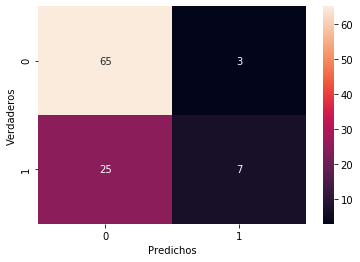

In [19]:
# Elaboramos a matriz de confusão:

confusion_matrix(y_test, 
                 y_pred_test
                )

sns.heatmap(confusion_matrix(y_test, y_pred_test), 
            annot = True
           )


plt.ylabel('Verdaderos')
plt.xlabel('Predichos');

In [20]:
# Calculamos a accurácia
accuracy_score(y_test, 
               y_pred_test
              )

0.72

#### Regressão Logística com o  `statsmodels`:

In [21]:
import statsmodels.api as sm

In [22]:
X_train_stats = sm.add_constant(X_train_scaled)

In [23]:
logit = sm.Logit(y_train, 
                 X_train_stats
                )
result = logit.fit()

print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.588205
         Iterations 5
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.058     
Dependent Variable: admit            AIC:              364.9233  
Date:               2021-01-31 23:12 BIC:              387.1460  
No. Observations:   300              Log-Likelihood:   -176.46   
Df Model:           5                LL-Null:          -187.30   
Df Residuals:       294              LLR p-value:      0.00060342
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
const     -0.8291     0.1315   -6.3046   0.0000   -1.0869   -0.5714
x1         0.2004     0.1405    1.4270   0.1536   -0.0749 

In [24]:
X_test_stats = sm.add_constant(X_test_scaled)

In [25]:
y_pred_stats = result.predict(X_test_stats) > 0.5
confusion_matrix(y_test, y_pred_stats)

array([[65,  3],
       [25,  7]])

In [26]:
accuracy_score(y_test, 
               y_pred_stats
              )

0.72